In [11]:
import torch
from torchvision.datasets import ImageFolder
import pandas as pd
import numpy as np

In [3]:
ds = ImageFolder("/data/rg_evaluation_imagenet/val/")

In [4]:
ds.classes

['n00000000', 'n00000001', 'n00000002', 'n00000003', 'n00000004', 'n00000005']

In [8]:
idxs = {i: [] for i in range(len(ds.classes))}

for s in ds.samples:
    
    idxs[s[1]].append(s[0])

In [12]:
sample = []
n = 1000

for c in idxs:
    sample.extend(np.random.choice(idxs[c], n, replace=False))

In [13]:
len(sample)

6000

In [14]:
def stratified_sampling(ds, n):
    
    # Build lookup table of class -> file
    idxs = {i: [] for i in range(len(ds.classes))}

    for s in ds.samples:

        idxs[s[1]].append(s[0])
    
    # Build sample
    sample = []
    for c in idxs:
        sample.extend(np.random.choice(idxs[c], n, replace=False))
    
    return np.array(sample)

In [15]:
%matplotlib inline

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.DataFrame(
    {
        "Dinov2": {
            "KNN": 53.8,
            "Linear": 55,
            "MLP": 61
        },
        "CapeDino": {
            "KNN": 66.2,
            "Linear": 66.9,
            "MLP": 85
        },
        "Multitask backbone": {
            "KNN": 37.1,
            "Linear": np.nan,
            "MLP": np.nan
        }
    }
)

print(df); 
melted_df = df.reset_index().melt(id_vars='index').rename({'index': 'head', 'variable': 'model', 'value': 'accuracy'}, axis=1)
print(melted_df)

        Dinov2  CapeDino  Multitask backbone
KNN       53.8      66.2                37.1
Linear    55.0      66.9                 NaN
MLP       61.0      85.0                 NaN
     head               model  accuracy
0     KNN              Dinov2      53.8
1  Linear              Dinov2      55.0
2     MLP              Dinov2      61.0
3     KNN            CapeDino      66.2
4  Linear            CapeDino      66.9
5     MLP            CapeDino      85.0
6     KNN  Multitask backbone      37.1
7  Linear  Multitask backbone       NaN
8     MLP  Multitask backbone       NaN


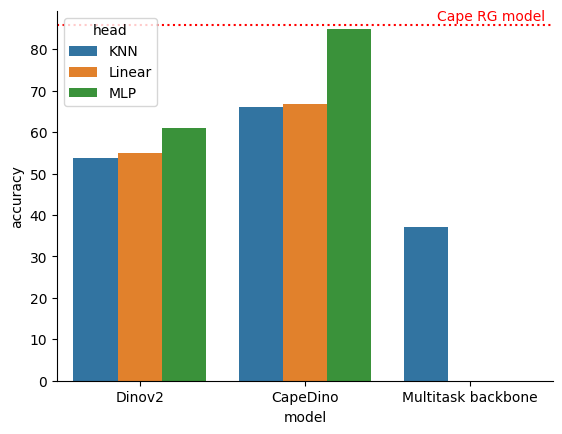

In [42]:
sns.barplot(x='model', y='accuracy', hue='head', data=melted_df, errorbar=None)
sns.despine()
_ = plt.axhline(86, linestyle=':', color='red')
_ = plt.text(1.8, 87, 'Cape RG model', color='red')

In [47]:
df = pd.DataFrame(
    {
        "Dinov2": {
            "KNN": 46.4,
            "Linear": 46,
            "MLP": 47
        },
        "CapeDino": {
            "KNN": 54.4,
            "Linear": 56.5,
            "MLP": 61
        },
        "Multitask backbone": {
            "KNN": 37.2,
            "Linear": 39.5,
            "MLP": np.nan
        }
    }
)

melted_df = df.reset_index().melt(id_vars='index').rename({'index': 'head', 'variable': 'model', 'value': 'accuracy'}, axis=1)

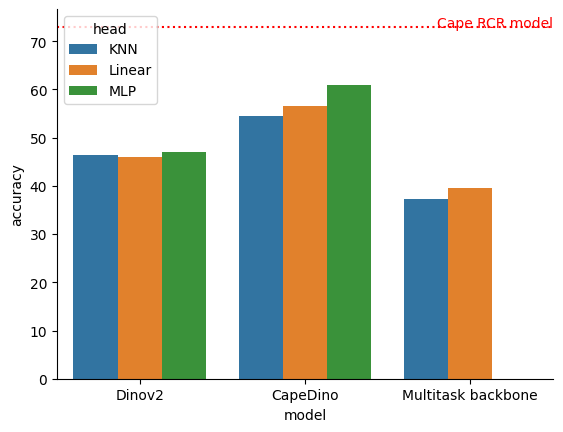

In [48]:
sns.barplot(x='model', y='accuracy', hue='head', data=melted_df, errorbar=None)
sns.despine()
_ = plt.axhline(73, linestyle=':', color='red')
_ = plt.text(1.8, 73, 'Cape RCR model', color='red')